<a href="https://colab.research.google.com/github/its-Harpreet/Machine-Learning/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv')

In [ ]:
df.head()

In [ ]:
df.info()


In [ ]:
x=df.drop('Outcome',axis=1)
x.shape

In [6]:
y=df['Outcome']

In [ ]:
tf.__version__

In [13]:
model= tf.keras.models.Sequential()

In [14]:
model.add(tf.keras.layers.Dense(12, activation='relu', input_shape=(8,)))

In [15]:
model.add(tf.keras.layers.Dense(8, activation='relu'))

In [16]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
history= model.fit(
    x=x,
    y=y,
    batch_size=8,
    epochs= 100
)

Epoch 1/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7773
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7760
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7773
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7682
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7708
Epoch 6/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7708
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7865
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7669
Epoch 9/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7591
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7682
Epoch 11/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f410c14f7d0>,
      dtype=object)

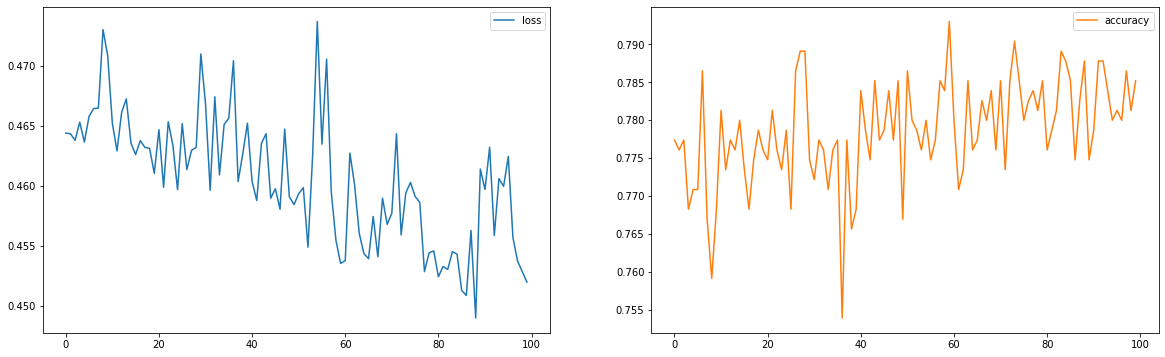

In [28]:
pd.DataFrame(history.history).plot(subplots=True, layout=(1,2), figsize=(20,6))

In [29]:
df['Pred']= model.predict(x)

In [33]:
df['PredClass']= (df['Pred']>0.5).astype(int)

In [34]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,PredClass
0,6,148,72,35,0,33.6,0.627,50,1,0.780717,1
1,1,85,66,29,0,26.6,0.351,31,0,0.138325,0
2,8,183,64,0,0,23.3,0.672,32,1,0.715759,1
3,1,89,66,23,94,28.1,0.167,21,0,0.138325,0
4,0,137,40,35,168,43.1,2.288,33,1,0.723509,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.159977,0
764,2,122,70,27,0,36.8,0.340,27,0,0.316247,0
765,5,121,72,23,112,26.2,0.245,30,0,0.121818,0
766,1,126,60,0,0,30.1,0.349,47,1,0.427920,0


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
print(confusion_matrix(y, df['PredClass'].values))

[[449  51]
 [119 149]]


In [38]:
print(classification_report(y, df['PredClass'].values))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.56      0.64       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768

